In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import SXdgGate
from qiskit.tools.monitor import job_monitor

In [14]:
def cnot(inp1, inp2):
    qc = QuantumCircuit(2, 2)
    
    if(inp1 == '1'):
        qc.x(0)
    if(inp2 == '1'):
        qc.x(1)

    qc.barrier()
    qc.cx(0, 1)
    
    qc.measure(0, 1)
    qc.measure(1, 0)
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

A B   PQ
0 0 = 00
0 1 = 01
1 0 = 11
1 1 = 10
____________________________
The quantum circuit of CNOT gate


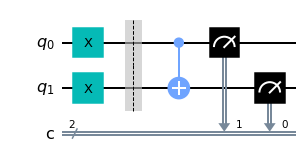

_______________________________
The histogram plot for the CNOT gate


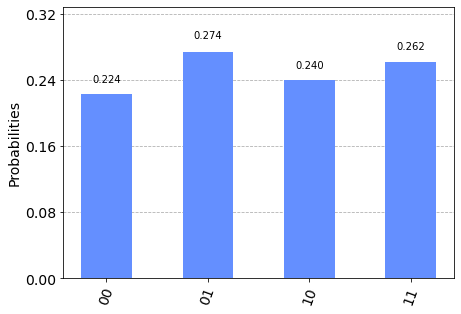

In [22]:
print('{} {}'.format('A', 'B'), '  PQ' )
for inp1 in ['0', '1']:
    for inp2 in ['0','1']:
            qc, out = cnot(inp1, inp2)
            print('{} {}'.format(inp1, inp2), '=', out)

print('____________________________')
print('The quantum circuit of CNOT gate')
display(qc.draw('mpl'))

#plotting the histogram
qc_hist = QuantumCircuit(2, 2)
qc_hist.cx(0, 1)
qc_hist.h(0)
qc_hist.h(1)
qc_hist.measure(0, 1)
qc_hist.measure(1, 0)
job = execute(qc_hist, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
print('_______________________________')
print('The histogram plot for the CNOT gate')
plot_histogram(count) 

A B C   PQR
0 0 0 = 000
0 0 1 = 001
0 1 0 = 010
0 1 1 = 011
1 0 0 = 100
1 0 1 = 101
1 1 0 = 111
1 1 1 = 110
____________________________
The quantum circuit of Toffoli gate


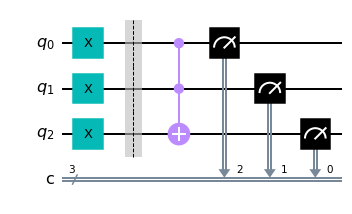

_______________________________
The histogram plot for the Toffoli gate


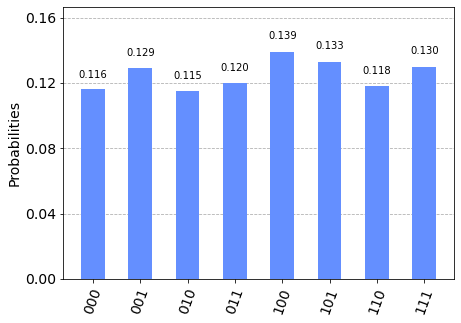

In [3]:
def Toffoli(inp1, inp2, inp3):
    qc = QuantumCircuit(3, 3)
    
    if(inp1 == '1'):
        qc.x(0)
    if(inp2 == '1'):
        qc.x(1)
    if(inp3 == '1'):
        qc.x(2)

    qc.barrier()
    qc.ccx(0, 1, 2)
    
    qc.measure(0, 2)
    qc.measure(1, 1)
    qc.measure(2, 0)
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

print('{} {} {}'.format('A', 'B', 'C'), '  PQR' )
for inp1 in ['0', '1']:
    for inp2 in ['0','1']:
        for inp3 in ['0','1']:
            qc, out = Toffoli(inp1, inp2, inp3)
            print('{} {} {}'.format(inp1, inp2, inp3), '=', out)

print('____________________________')
print('The quantum circuit of Toffoli gate')
display(qc.draw('mpl'))

#plotting the histogram
qc_hist = QuantumCircuit(3, 3)
qc_hist.ccx(0, 1, 2)
for i in range(3):
    qc_hist.h(i)
qc_hist.measure(0, 2)
qc_hist.measure(1, 1)
qc_hist.measure(2, 0)
job = execute(qc_hist, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
print('_______________________________')
print('The histogram plot for the Toffoli gate')
plot_histogram(count) 

A B C   PQR
0 0 0 = 000
0 0 1 = 001
0 1 0 = 010
0 1 1 = 011
1 0 0 = 100
1 0 1 = 110
1 1 0 = 101
1 1 1 = 111
____________________________
The quantum circuit of Fredkin gate


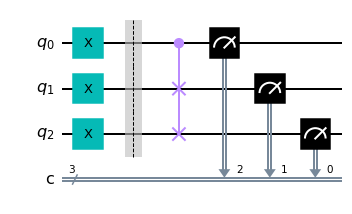

_______________________________
The histogram plot for the Fredkin gate


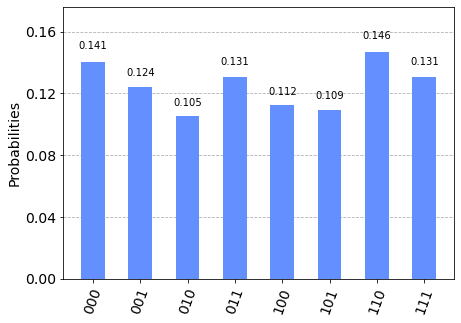

In [5]:
#defining a function to check the output for all the combinations
def Fredkin(inp1, inp2, inp3):
    qc = QuantumCircuit(3, 3)
    #checking for the input 1 conditions
    if(inp1 == '1'):
        qc.x(0)
    if(inp2 == '1'):
        qc.x(1)
    if(inp3 == '1'):
        qc.x(2)
    qc.barrier()
    #Fredkin gate
    qc.cswap(0, 1, 2)
    #measurements for all inputs
    qc.measure(0, 2)
    qc.measure(1, 1)
    qc.measure(2, 0)
    #using Aer backend and qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1, memory= True)
    output = job.result().get_memory()[0]
    return qc, output




#looping over to get all possible combinations
print('{} {} {}'.format('A', 'B', 'C'), '  PQR' )
for inp1 in ['0', '1']:
    for inp2 in ['0','1']:
        for inp3 in ['0','1']:
            qc, out = Fredkin(inp1, inp2, inp3)
            print('{} {} {}'.format(inp1, inp2, inp3), '=', out)

#to draw the quantum circuit for the Fredkin gate
print('____________________________')
print('The quantum circuit of Fredkin gate')
display(qc.draw('mpl'))

#plotting the histogram
qc_hist = QuantumCircuit(3, 3)
qc_hist.cswap(0, 1, 2)
for i in range(3):
    qc_hist.h(i)
qc_hist.measure(0, 2)
qc_hist.measure(1, 1)
qc_hist.measure(2, 0)
job = execute(qc_hist, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
print('_______________________________')
print('The histogram plot for the Fredkin gate')
plot_histogram(count)


ibmqfactory.load_account:WARNING:2021-07-26 10:43:21,848: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
None


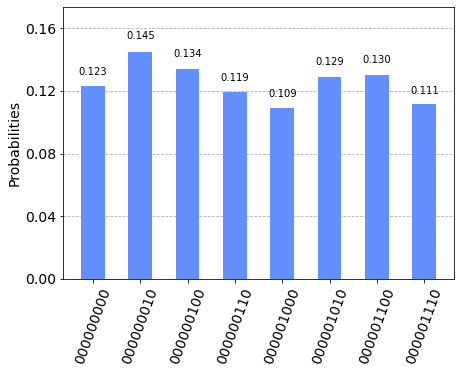

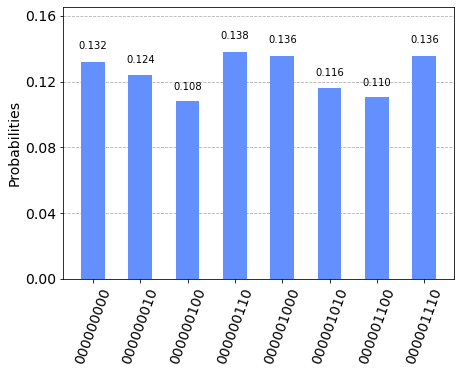

In [4]:
#ZPLG gate
qc = QuantumCircuit(5)
qc.cx(1, 4)
qc.cx(3, 0)
qc.csx(0, 3)
qc.csx(1, 3)
qc.cx(0, 1)
qc.csx(2, 3)
qc.cx(1, 2)

csxdg_gate = SXdgGate().control()
qc.append(csxdg_gate, [2, 3])

qc.cx(3, 4)
zplg_gate = qc.to_gate()


#doublefeynman gate
qcf = QuantumCircuit(3)
qcf.cx(0, 2)
qcf.cx(0, 1)
f2g_gate = qcf.to_gate()

#the AU part
au = QuantumCircuit(8)
au.cswap(0, 1, 2)
au.cswap(3, 4, 5)
au.append(zplg_gate, [6, 4, 1, 7, 3])
au_gate = au.to_gate()


IBMQ.load_account()
IBMQ.providers()
providers = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider("ibm-q")

#histogram plot of the ALU 1 modified

qc = QuantumCircuit(16, 9)
for i in range(4):
    qc.h(i)

#adding au circuit
qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])

#addding lu gates
qc.append(zplg_gate, [8, 9, 10, 11, 12])
qc.cswap(13, 10, 11)
qc.cswap(15, 1, 10)
qc.cswap(8, 3, 14)

#measurements
qc.measure(7, 0)
qc.measure(1, 1)


qc.measure(3, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)

backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
print(job_monitor(job))
result = job.result()
counts = result.get_counts(qc)
display(plot_histogram(counts))

backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

Job Status: job has successfully run
None


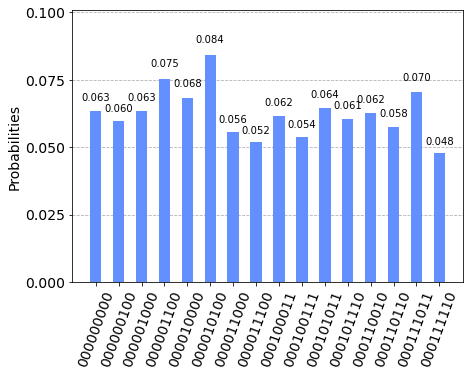

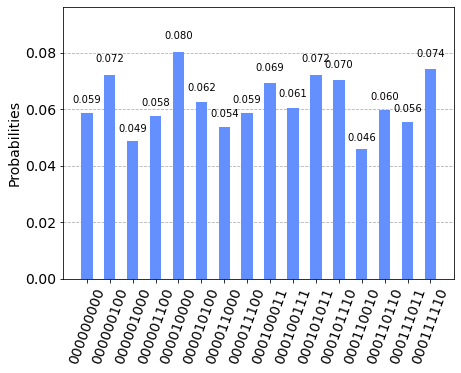

In [7]:
#doublefeynman gate
qcf = QuantumCircuit(3)
qcf.cx(0, 2)
qcf.cx(0, 1)
f2g_gate = qcf.to_gate()

#uppg gate
uppg_circuit = QuantumCircuit(4)
uppg_circuit.cx(3, 1)
uppg_circuit.cx(1, 0)
uppg_circuit.cx(0, 1)
uppg_circuit.ccx(3, 2, 1)
uppg_circuit.cx(1, 2)
uppg_circuit.cx(3, 2)
uppg_gate = uppg_circuit.to_gate()

#histogram plot of the ALU gate

qc = QuantumCircuit(11, 9)
for i in range(4):
    qc.h(i)

#adding the fredkin gate
qc.cswap(0, 1, 2)
qc.cswap(4, 5, 6)

#importing the zplg gate
qc.append(zplg_gate, [3, 5, 1, 7, 4])

#LOGIC GATES
#adding the uppg gate
qc.append(uppg_gate, [1, 4, 9, 0])
qc.cswap(2, 1, 4)

#adding the fredkin gate
qc.cswap(8, 1, 3)
qc.cswap(10, 1, 3)

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(3, 1)

qc.measure(1, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)


backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
print(job_monitor(job))
result = job.result()
counts = result.get_counts(qc)
display(plot_histogram(counts))


backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

Job Status: job has successfully run
None


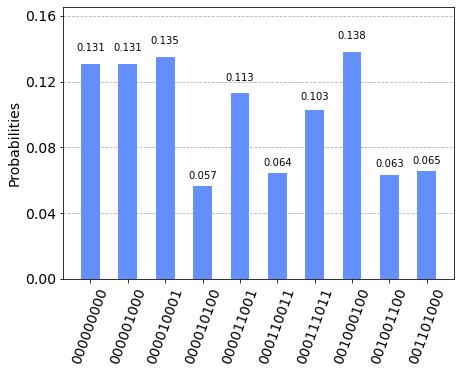

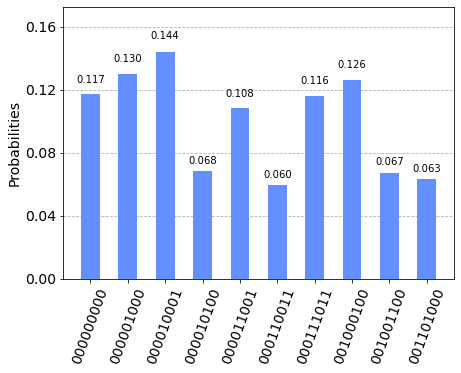

In [8]:
qc = QuantumCircuit(7, )
#adding the f2g gate
qc.append(f2g_gate, [0, 1, 2])

#adding the fredkin gate
qc.cswap(3, 4, 5)

#importing the zplg gate
qc.append(zplg_gate, [6, 4, 1, 7, 3])

#adding the double feynman gate
qc.append(f2g_gate, [8, 1, 3])

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(3, 1)
    
qc.measure(1, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)


backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
print(job_monitor(job))
result = job.result()
counts = result.get_counts(qc)
display(plot_histogram(counts))


backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)